In [8]:
import numpy as np
import xarray as xr
import math
from scipy.interpolate import interp1d
import scipy.stats as stats
import matplotlib.pyplot as plt

0.5000000000000001
0.5000000000000001


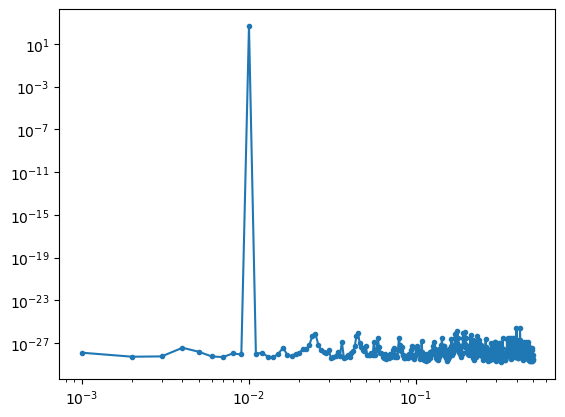

In [41]:
%run -i nanspectrum.py
%run -i ~/Documents/Python/lkach_useful/src/lkach_useful/functions.py

t_range = np.array(range(1,10001))
PERIOD = 100
Data = np.sin(2*np.pi*(t_range - 1)/PERIOD)
Data = Data

#plt.figure()
#plt.plot(Data,".-")

#Spectrum, f_vec, err = nanspectrum(Data,1,"step",10,".-",0,0 ,'np.hanning');
Spectrum, f_vec, err = nanspectrum(Data,1,"step",10,".-",0,0 ,'rectwin');
# ^ Using 'np.hanning' is recommended in general; here we use 'rectwin'
# because the input is perfectly periodic over segments, and is used as
# a test to be sure that nanspectrum does not introduce some artificial
# spectral contamination.

plt.figure()
plt.loglog(f_vec,Spectrum,'.-')

print(np.var(Data)) # variance of data
print(np.sum(Spectrum*f_vec[0])) # variance from spectrum; should match above due to Parseval's theorem; if it doesn't then something went wrong

0.9978301078970039
0.9878442517827272


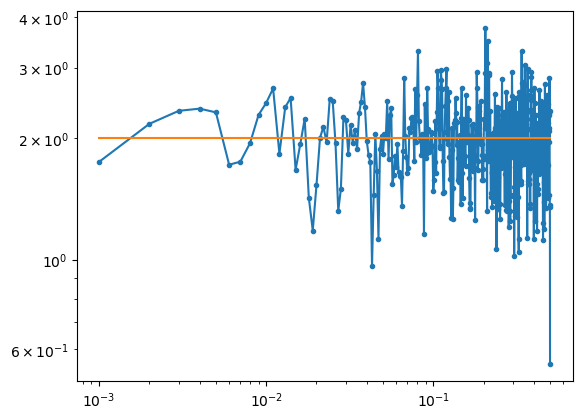

In [26]:
# White noise
Data = numpy.random.randn(10000,)

#plt.figure()
#plt.plot(Data,".-")

Spectrum, f_vec, err = nanspectrum(Data,1,"step",10,".-",0,0 ,'np.hanning');

plt.figure()
plt.loglog(f_vec,Spectrum,'.-')
plt.loglog(f_vec,2*f_vec**0)

print(np.var(Data))
print(np.sum(Spectrum*f_vec[0]))

10.253143075517295
9.785643697531368


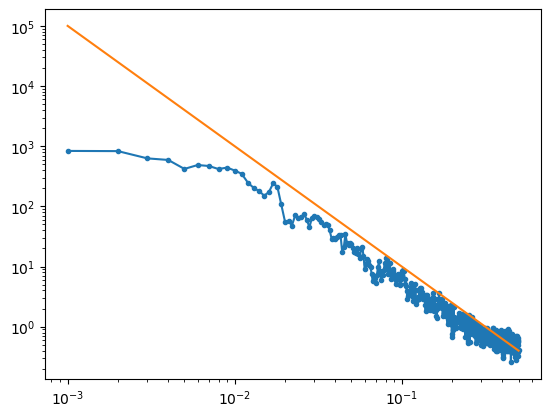

In [42]:
# Red noise (frequency^-2)
Data = numpy.random.randn(10000,) # initial white noise
for i in range(2, 10000): # build autoregressive time series, which is red noise
    Data[i] = Data[i] + numpy.sum(0.95 * Data[i-1:i])
    # ^ If the constant above were 1 instead of 0.95,
    # the output Data would be a true f^-2 autoregressive
    # time series, but because segmenting will miss the
    # long-period, large-amplitude variability, Parseval's
    # theorem will be be fulfilled (probably something to
    # do with assumptions of statistical stationarity).

#plt.figure()
#plt.plot(Data,".-")

Spectrum, f_vec, err = nanspectrum(Data,1,"step",10,".-",0,0 ,'np.hanning');

plt.figure()
plt.loglog(f_vec,Spectrum,'.-')
plt.loglog(f_vec,0.1*f_vec**-2)

print(np.var(Data))
print(np.sum(Spectrum*f_vec[0]))